# Processo de análise de dados

1. **Definição do problema**
2. **Coleta de dados**
3. **Limpezas e transformações**

### Usando a biblioteca pandas para análise de dados

Iremos utilizar um conjunto de dados FICTÍCIO de uma sala de aula, onde veremos as notas dos alunos e a quantidade de faltas de cada um. O objetivo é analisar esses dados para utilizar em um conselho de classe visando melhoria de desempenho dos alunos frente a disciplina que temos em questão.

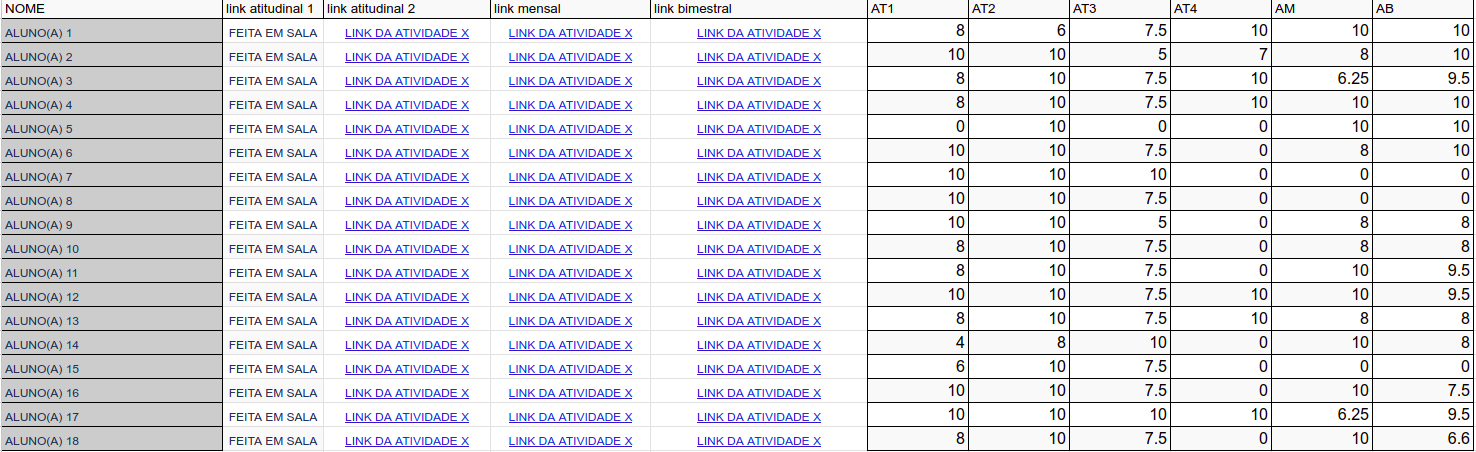

In [9]:
# importando pandas e matplotlib

import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Criando variáveis que usaremos de guia para o gráfico
media_escolar = 6
pesos_materia_dict = {
    'assiduidade': 0.05,
    'comportamento': 0.05,
    'atividades': 0.1,
    'prova_mensal': 0.3,
    'prova_bimestral': 0.5
}

dataframe = pd.read_csv('dataset_alunos_materia_x.csv')

In [11]:
# Mostrando as primeiras linhas do dataframe
dataframe.head()

,NOME,link atitudinal 1,link atitudinal 2,link mensal,link bimestral,AT1,AT2,AT3,AT4,AM,AB
0,ALUNO(A) 1,FEITA EM SALA,LINK DA ATIVIDADE X,LINK DA ATIVIDADE X,LINK DA ATIVIDADE X,10,10,10,10,10.00,0.0
1,ALUNO(A) 2,FEITA EM SALA,LINK DA ATIVIDADE X,LINK DA ATIVIDADE X,LINK DA ATIVIDADE X,10,10,5,7,8.00,10.0
2,ALUNO(A) 3,FEITA EM SALA,LINK DA ATIVIDADE X,LINK DA ATIVIDADE X,LINK DA ATIVIDADE X,8,10,7.5,10,6.25,9.5
3,ALUNO(A) 4,FEITA EM SALA,LINK DA ATIVIDADE X,LINK DA ATIVIDADE X,LINK DA ATIVIDADE X,8,10,-,-,10.00,10.0
4,ALUNO(A) 5,FEITA EM SALA,LINK DA ATIVIDADE X,LINK DA ATIVIDADE X,LINK DA ATIVIDADE X,0,10,0,0,10.00,10.0


# Definindo problema

Queremos ver os alunos que estão com baixo desempenho escolar para que possamos ajudá-los a melhorar suas notas e comportamento em sala de aula.

# Coleta de dados

Os dados foram coletados de forma fictícia e estão disponíveis no arquivo.

# Limpezas e transformações

- Precisamos de todas essas informações?
- Precisamos transformar os dados?
- Temos dados faltantes?
- Precisamos inputar dados faltantes?
- Temos ruídos nos dados?

In [12]:
# Retirando colunas desnecessárias (link atitudinal 1, link atitudinal 2, link mensal, link bimestral)

dataframe.drop(['link atitudinal 1', 'link atitudinal 2', 'link mensal', 'link bimestral'], axis=1, inplace=True)
# Mostrando todo o dataframe
dataframe

,NOME,AT1,AT2,AT3,AT4,AM,AB
0,ALUNO(A) 1,10,10,10,10,10.00,0.0
1,ALUNO(A) 2,10,10,5,7,8.00,10.0
2,ALUNO(A) 3,8,10,7.5,10,6.25,9.5
3,ALUNO(A) 4,8,10,-,-,10.00,10.0
4,ALUNO(A) 5,0,10,0,0,10.00,10.0
5,ALUNO(A) 6,10,10,7.5,0,8.00,10.0
6,ALUNO(A) 7,10,10,10,0,0.00,0.0
7,ALUNO(A) 8,10,10,7.5,0,0.00,0.0
8,ALUNO(A) 9,10,10,5,0,8.00,8.0
9,ALUNO(A) 10,8,10,7.5,0,8.00,8.0


In [13]:
# Inputação de valores faltantes
dataframe.fillna(0, inplace=True) # Preenchendo valores NaN com 0 (NaN pode ser considerado como "não informado")

# Preenchendo valores "-" com 0 (na tabela, "-" significa que o aluno não fez a atividade)
dataframe.replace('-', 0, inplace=True)

dataframe.head()

,NOME,AT1,AT2,AT3,AT4,AM,AB
0,ALUNO(A) 1,10,10,10,10,10.00,0.0
1,ALUNO(A) 2,10,10,5,7,8.00,10.0
2,ALUNO(A) 3,8,10,7.5,10,6.25,9.5
3,ALUNO(A) 4,8,10,0,0,10.00,10.0
4,ALUNO(A) 5,0,10,0,0,10.00,10.0


In [14]:
# Convertendo as colunas para float (exceto a coluna 'nome')
dataframe['NOME'] = dataframe['NOME'].astype(str) # Convertendo a coluna 'nome' para string

for column in dataframe.columns[1:]: # para cada coluna após a primeira (a primeira é a coluna 'nome')
    dataframe[column] = dataframe[column].astype(float)  # convertendo a coluna para float
    
dataframe.head() # Mostrando as primeiras linhas do dataframe

,NOME,AT1,AT2,AT3,AT4,AM,AB
0,ALUNO(A) 1,10.0,10.0,10.0,10.0,10.00,0.0
1,ALUNO(A) 2,10.0,10.0,5.0,7.0,8.00,10.0
2,ALUNO(A) 3,8.0,10.0,7.5,10.0,6.25,9.5
3,ALUNO(A) 4,8.0,10.0,0.0,0.0,10.00,10.0
4,ALUNO(A) 5,0.0,10.0,0.0,0.0,10.00,10.0


In [15]:
# Calculando a média final de cada aluno com base nos pesos das notas e na média escolar

dataframe['media_final'] = (
    (dataframe['AT1']*pesos_materia_dict['assiduidade']) + 
    (dataframe['AT2']*pesos_materia_dict['comportamento']) + 
    (((dataframe['AT3'] + dataframe['AT4'])/2)*pesos_materia_dict['atividades']) + 
    (dataframe['AM']*pesos_materia_dict['prova_mensal']) + 
    (dataframe['AB']*pesos_materia_dict['prova_bimestral'])
).round(2)

dataframe.head()

,NOME,AT1,AT2,AT3,AT4,AM,AB,media_final
0,ALUNO(A) 1,10.0,10.0,10.0,10.0,10.00,0.0,5.0
1,ALUNO(A) 2,10.0,10.0,5.0,7.0,8.00,10.0,9.0
2,ALUNO(A) 3,8.0,10.0,7.5,10.0,6.25,9.5,8.4
3,ALUNO(A) 4,8.0,10.0,0.0,0.0,10.00,10.0,8.9
4,ALUNO(A) 5,0.0,10.0,0.0,0.0,10.00,10.0,8.5


In [16]:
# Adicionando a coluna 'situacao' ao dataframe

dataframe['situacao'] = dataframe['media_final'].apply(lambda x: 'aprovado' if x >= media_escolar else 'reprovado')
dataframe.head()

,NOME,AT1,AT2,AT3,AT4,AM,AB,media_final,situacao
0,ALUNO(A) 1,10.0,10.0,10.0,10.0,10.00,0.0,5.0,reprovado
1,ALUNO(A) 2,10.0,10.0,5.0,7.0,8.00,10.0,9.0,aprovado
2,ALUNO(A) 3,8.0,10.0,7.5,10.0,6.25,9.5,8.4,aprovado
3,ALUNO(A) 4,8.0,10.0,0.0,0.0,10.00,10.0,8.9,aprovado
4,ALUNO(A) 5,0.0,10.0,0.0,0.0,10.00,10.0,8.5,aprovado


## Distância euclidiana

A distância euclidiana é uma medida de distância entre dois pontos, que pode ser calculada a partir das suas coordenadas. A fórmula para calcular a distância euclidiana entre dois pontos é o ponto de partida para muitos algoritmos de aprendizado de máquina.

### Distância euclidiana em uma dimensão (AT1)

Vamos supor que queremos ver os alunos mais próximos/parecidos do "ALUNO(A)1". Para isso, vamos calcular a distância euclidiana entre o aluno 1 e os demais alunos.

A distância euclidiana entre dois pontos em uma dimensão é dada por:
AT1 DO ALUNO(A)1 - AT1 DO ALUNO(A)X = DISTÂNCIA EUCLIDIANA

Veja abaixo a distância euclidiana entre o aluno 1 e os demais alunos:

|ALUNO(A)1|ALUNO(A)X|DISTÂNCIA EUCLIDIANA|
|---------|---------|---------------------|
10        | 10      |  0                  |
10        | 8       |  2                  |
10        | 8       |  2                  |
10        | 0       |  10                 |



# Lição de casa (distância euclidiana e KNN)

Calcule a distância euclidiana de todos os alunos em relação ao aluno 1 em todas as notas.

Após isso, veja os 3 alunos mais próximos do aluno com maior nota e menor nota (KNN, K=3).

Veja no exemplo abaixo o cálculo da distância euclidiana entre o aluno 1 e o segundo aluno:

|ALUNO(A)1|ALUNO(A)X|D.E AT1|D.E AT2|D.E AT3|D.E AT4|D.E AM|D.E AB|D.E TOTAL|
|---------|---------|-------|-------|-------|-------|-----|-----|-----|
ALUNO(A)1 | ALUNO(A)2| 0     | 0     | 5     | 3     | 2 | 10   | 20 |
ALUNO(A)1 | ALUNO(A)3| 2     | 0     | 2.5     | 0     | 3.75 | 9.5   | 17.75 |
ALUNO(A)1 | ALUNO(A)4| 2     | 0     | 10     | 10     | 0 | 10   | 32 |
ALUNO(A)1 | ALUNO(A)5| 10     | 0    | 10     | 10     | 0 | 10   | 40 |


### A DISTÂNCIA EUCLIDIANA ACIMA É A DISTANCIA UNIDIMENSIONAL (ESTAMOS ANALISANDO APENAS UMA GRANDEZA POR VEZ)

## Distância euclidiana multidimensional

Imagine que estamos analisando um dataset com várias dimensões. Como por exemplo um dataset com peso, altura e idade de várias pessoas. Nesse caso, veja o dataset exemplo abaixo:

|PESO|ALTURA|IDADE|
|----|------|-----|
|70  | 1.80 | 25  |
|82  | 1.70 | 30  |
|60  | 1.60 | 20  |
|94  | 1.75 | 35  |
|100 | 1.90 | 40  |
|50  | 1.55 | 12  |
|73  | 1.80 | 22  |

se formos calcular a distância euclidiana entre o primeiro e o segundo aluno, teremos:
$$\sqrt{(70-82)^2 + (1.80-1.70)^2 + (25-30)^2}$$
$$\sqrt{(-12)^2 + (0.10)^2 + (-5)^2}$$
$$\sqrt{144 + 0.01 + 25}$$
$$\sqrt{169.01}$$
$$13.00$$

### Conversão para base entre 0 e 1

Por que precisamos converter as variáveis para uma base entre 0 e 1?

Imagine que temos um dataset com idade e salário. A idade varia de 0 a 100 e o salário varia de 0 a 10000. Se calcularmos a distância euclidiana entre essas duas variáveis, a variável salário terá um peso muito maior que a variável idade, pois ela varia muito mais. Para evitar isso, convertemos as variáveis para uma base entre 0 e 1.

Podemos realizar essa operação com regra de três simples.